<a href="https://colab.research.google.com/github/coraline1111/UTS-Group-Project/blob/version-1/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mount Google Drive and Merge csv files

In [1]:
# import libiary
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import folium
import geopandas as gpd
from shapely.geometry import Point
from folium.plugins import HeatMap
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans, DBSCAN
import plotly.express as px
import plotly.subplots as sp


In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Read a CSV file named '2016Q1' from the folder
file_path = '/content/drive/My Drive/Group Project/Dataset/2016Q1.csv'
df = pd.read_csv(file_path)
df.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


In [5]:
# get the folder path
folder_path = '/content/drive/My Drive/Group Project/Dataset'


In [6]:
# list csv files
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(csv_files)


['2016Q1.csv', '2016Q2.csv', '2016Q3.csv', '2016Q4.csv', '2017Q1.csv', '2017Q2.csv', '2017Q3.csv', '2017Q4.csv', '201801.csv', '201802.csv', '201803.csv', '201804.csv', '201805.csv', '201806.csv', '201807.csv', '201808.csv', '201809.csv', '201810.csv', '201811.csv', '201812.csv']


In [7]:
# merge all csv (they have the same column names)
combined_df = pd.concat(
    [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files],
    ignore_index=True
)
combined_df.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


In [8]:
# checking tails
combined_df.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
10634450,3313,2018-12-31 23:37:22,2019-01-01 00:32:36,31615,6th & H St NE,31624,North Capitol St & F St NW,W00159,Member
10634451,888,2018-12-31 23:42:18,2018-12-31 23:57:07,31618,4th & East Capitol St NE,31509,New Jersey Ave & R St NW,W22026,Member
10634452,2332,2018-12-31 23:44:23,2019-01-01 00:23:16,31907,Franklin & S Washington St,32406,Fleet St & Waterfront St,W23900,Member
10634453,307,2018-12-31 23:52:42,2018-12-31 23:57:50,31114,18th St & Wyoming Ave NW,31103,16th & Harvard St NW,W00761,Member
10634454,1062,2018-12-31 23:54:09,2019-01-01 00:11:52,31110,20th St & Florida Ave NW,31014,Lynn & 19th St North,W21324,Member


In [9]:
# for future reference and convience, saving the merged DataFrame as a new CSV
output_path = '/content/drive/My Drive/Group Project/combined_dataset.csv'
combined_df.to_csv(output_path, index=False)
print(f"Combined dataset saved to {output_path}")


Combined dataset saved to /content/drive/My Drive/Group Project/combined_dataset.csv




---


# Having a look at the merged dataset

In [10]:
# check number of columns and rows
combined_df.shape



(10634455, 9)

In [11]:
# checking column names
combined_df.columns.tolist()


['Duration',
 'Start date',
 'End date',
 'Start station number',
 'Start station',
 'End station number',
 'End station',
 'Bike number',
 'Member type']

In [12]:
# checking data types
print("Data types of each column:\n", combined_df.dtypes)


Data types of each column:
 Duration                 int64
Start date              object
End date                object
Start station number     int64
Start station           object
End station number       int64
End station             object
Bike number             object
Member type             object
dtype: object


In [13]:
# preview
combined_df.head()


,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member


In [14]:
# check summary statistics
print("Summary statistics:\n", combined_df.describe())


Summary statistics:
            Duration  Start station number  End station number
count  1.063446e+07          1.063446e+07        1.063446e+07
mean   1.148938e+03          3.131844e+04        3.131927e+04
std    2.255886e+03          2.183809e+02        2.157233e+02
min    6.000000e+01          3.100000e+04        3.100000e+04
25%    4.060000e+02          3.120400e+04        3.120900e+04
50%    7.010000e+02          3.125400e+04        3.125200e+04
75%    1.205000e+03          3.150200e+04        3.150000e+04
max    8.639400e+04          3.240700e+04        3.240700e+04


In [15]:
print("Summary statistics (including non-numeric):\n", combined_df.describe(include='all'))


Summary statistics (including non-numeric):
             Duration           Start date             End date  \
count   1.063446e+07             10634455             10634455   
unique           NaN              9514281              9503708   
top              NaN  2018-12-03 08:36:55  2017-05-03 18:36:58   
freq             NaN                   10                    7   
mean    1.148938e+03                  NaN                  NaN   
std     2.255886e+03                  NaN                  NaN   
min     6.000000e+01                  NaN                  NaN   
25%     4.060000e+02                  NaN                  NaN   
50%     7.010000e+02                  NaN                  NaN   
75%     1.205000e+03                  NaN                  NaN   
max     8.639400e+04                  NaN                  NaN   

        Start station number                    Start station  \
count           1.063446e+07                         10634455   
unique                   NaN    

In [16]:
# get frequency of a value for Start station - because I thought it would be interesting to have an early peak
combined_df['Start station'].value_counts()



,count
Start station,
Columbus Circle / Union Station,201905
Lincoln Memorial,179952
Jefferson Dr & 14th St SW,159034
Massachusetts Ave & Dupont Circle NW,138180
15th & P St NW,124225
...,...
Joliet St & MLK Ave SW/Bald Eagle Rec Ctr,26
Oxon Hill Park & Ride,24
34th St & Minnesota Ave SE,20


In [17]:
# check number of unique values in each column
print("Number of unique values in each column:\n", combined_df.nunique())


Number of unique values in each column:
 Duration                  32385
Start date              9514281
End date                9503708
Start station number        530
Start station               544
End station number          530
End station                 544
Bike number                5586
Member type                   2
dtype: int64


In [18]:
# preview
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10634455 entries, 0 to 10634454
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 730.2+ MB




---


# Data cleaning


In [19]:
# check for missing values
combined_df.isnull().sum()


,0
Duration,0
Start date,0
End date,0
Start station number,0
Start station,0
End station number,0
End station,0
Bike number,0
Member type,0


In [20]:
# check for duplicates
combined_df.duplicated().sum()

18441

In [21]:
# remove duplicate rows
combined_df = combined_df.drop_duplicates()
combined_df.shape


(10616014, 9)

In [22]:
# Reset the index after removing duplicates
combined_df.reset_index(drop=True, inplace=True)
print("Index has been reset.")

Index has been reset.


In [23]:
# remove outliers
# Select only numeric columns for outlier removal
numeric_cols = combined_df.select_dtypes(include=['number'])

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for numeric columns
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1  # Interquartile Range

# Define the range for acceptable values
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows that have outliers in numeric columns
filtered_df = combined_df[~((numeric_cols < lower_bound) | (numeric_cols > upper_bound)).any(axis=1)]

# Check shape after removing outliers
print(f"Shape before removing outliers: {combined_df.shape}")
print(f"Shape after removing outliers: {filtered_df.shape}")



Shape before removing outliers: (10616014, 9)
Shape after removing outliers: (9587966, 9)


In [24]:
print(filtered_df.describe())


           Duration  Start station number  End station number
count  9.587966e+06          9.587966e+06        9.587966e+06
mean   7.714351e+02          3.130589e+04        3.130782e+04
std    4.866921e+02          1.966068e+02        1.953617e+02
min    6.000000e+01          3.100000e+04        3.100000e+04
25%    3.900000e+02          3.120200e+04        3.120500e+04
50%    6.510000e+02          3.125100e+04        3.125000e+04
75%    1.054000e+03          3.140700e+04        3.140600e+04
max    2.404000e+03          3.192500e+04        3.192500e+04


In [25]:
filtered_df.to_csv('cleaned_dataset.csv', index=False)


# Data Preparation and Exploration

In [26]:
# Inspect the dataset
print(filtered_df.info())
print(filtered_df.head())

# Check for missing values
print(filtered_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
Index: 9587966 entries, 0 to 10616013
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 731.5+ MB
None
   Duration           Start date             End date  Start station number  \
0       166  2016-01-01 00:06:58  2016-01-01 00:09:44                 31102   
2       715  2016-01-01 00:13:52  2016-01-01 00:25:48                 31222   
3       213  2016-01-01 00:15:29  2016-01-01 00:19:03                 31506   
4       872  2016-01-01 00:16:16  2016-01-01 00:30:49                 31041   
5       859  2016-01-01 00:16:18  2016-01-01 00:30:37             

# Feature Engineering

In [27]:
# Convert "Start date" to datetime and filter relevant years
filtered_df['Start date'] = pd.to_datetime(filtered_df['Start date'])
filtered_df = filtered_df[(filtered_df['Start date'].dt.year >= 2016) & (filtered_df['Start date'].dt.year <= 2018)]

print(f"Filtered dataset shape: {filtered_df.shape}")


<ipython-input-27-2471d81305ed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Start date'] = pd.to_datetime(filtered_df['Start date'])


Filtered dataset shape: (9587966, 9)


In [28]:
# Extract features from "Start date"
filtered_df['Year'] = filtered_df['Start date'].dt.year
filtered_df['Month'] = filtered_df['Start date'].dt.month
filtered_df['Day'] = filtered_df['Start date'].dt.day
filtered_df['Hour'] = filtered_df['Start date'].dt.hour
filtered_df['Weekday'] = filtered_df['Start date'].dt.weekday

print(filtered_df.head())


   Duration          Start date             End date  Start station number  \
0       166 2016-01-01 00:06:58  2016-01-01 00:09:44                 31102   
2       715 2016-01-01 00:13:52  2016-01-01 00:25:48                 31222   
3       213 2016-01-01 00:15:29  2016-01-01 00:19:03                 31506   
4       872 2016-01-01 00:16:16  2016-01-01 00:30:49                 31041   
5       859 2016-01-01 00:16:18  2016-01-01 00:30:37                 31041   

               Start station  End station number               End station  \
0        11th & Kenyon St NW               31105      14th & Harvard St NW   
2  New York Ave & 15th St NW               31214     17th & Corcoran St NW   
3  1st & Rhode Island Ave NW               31509  New Jersey Ave & R St NW   
4       Prince St & Union St               31048       King St Metro South   
5       Prince St & Union St               31048       King St Metro South   

  Bike number Member type  Year  Month  Day  Hour  Weekday  
0

In [29]:
# Calculate ride duration in minutes
filtered_df['Duration (min)'] = filtered_df['Duration'] / 60


# Modeling 1 - Reducing Bike Availability Wait Time


1. Predict peak demand hours












In [30]:
# Aggregate hourly bike usage
filtered_df['Hour'] = pd.to_datetime(filtered_df['Start date']).dt.hour
filtered_df['Weekday'] = pd.to_datetime(filtered_df['Start date']).dt.weekday

hourly_usage = filtered_df.groupby(['Hour', 'Weekday']).size().reset_index(name='Bike Usage')

# Add any additional features if necessary
hourly_usage['Weekend'] = hourly_usage['Weekday'].apply(lambda x: 1 if x >= 5 else 0)


In [31]:
# Define features (X) and target (y)
X = hourly_usage[['Hour', 'Weekday', 'Weekend']]
y = hourly_usage['Bike Usage']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [33]:
from sklearn.metrics import mean_absolute_error, r2_score
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 5001.910000000002
R² Score: 0.9741301110815251


In [34]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"XGBoost MAE: {mae}")
print(f"XGBoost R²: {r2}")

XGBoost MAE: 3120.1207024069395
XGBoost R²: 0.9912775754928589


It looks like XGBoost model is producing the best result out of the all three models.

MAE (3120): The average difference between predicted and actual bike usage is about 3120 bikes. Depending on the scale of the data (for example, if bike usage is in the range of thousands per day), this could be acceptable or it might need improvement.

R² (0.99): This indicates that 99% of the variance in bike usage is explained by the model, which is an excellent result. A high R² score suggests that the model has captured the key patterns in the data.

Hypertunning for possible overfitting

In [35]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(XGBRegressor(n_estimators=100, random_state=42), X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-cv_scores.mean()}")  # Negative because cross_val_score returns negative values for loss functions


Cross-validated MAE: 5141.319363898905


In [36]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the model
xgb = XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error', verbose=1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {-grid_search.best_score_}")  # Negative because we are minimizing MAE


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}
Best cross-validation score: 8822.769520399306


In [37]:
# Use the best hyperparameters from grid search
best_xgb = XGBRegressor(
    colsample_bytree=grid_search.best_params_['colsample_bytree'],
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    n_estimators=grid_search.best_params_['n_estimators'],
    subsample=grid_search.best_params_['subsample'],
    random_state=42
)

# Train the final model on the full training data
best_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb.predict(X_test)

# Evaluate the model performance on the test set
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 3636.0720879049863
R² Score: 0.9789811968803406


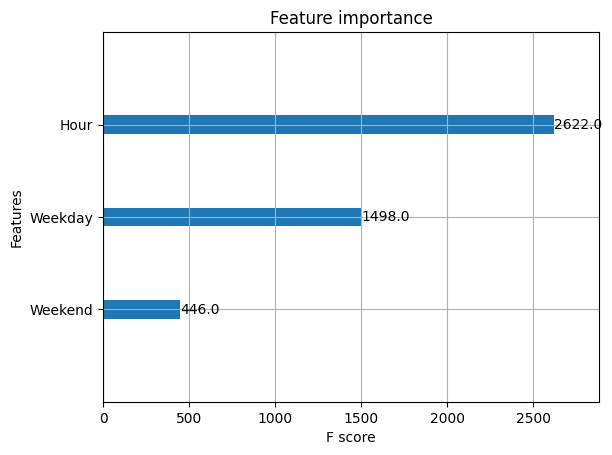

In [38]:
import matplotlib.pyplot as plt
from xgboost import plot_importance
# Fit the model with the best parameters from grid search
best_xgb = grid_search.best_estimator_

# Now plot the feature importance
plot_importance(best_xgb, importance_type='weight')  # You can also use 'gain' or 'cover'
plt.show()


High F-score Hour - 2622: This means the model is heavily relying on the time of day to predict bike usage.

It could be that bike usage is highly correlated with certain times, like rush hours.

In [57]:
# Create a DataFrame with all hours (0-23) and weekdays (0-6, Monday to Sunday)
hours = list(range(24))  # 0 to 23 for hours of the day
weekdays = list(range(7))  # 0 to 6 for weekdays (0 = Monday, 6 = Sunday)

# Generate combinations of hours and weekdays
hour_day_combinations = pd.DataFrame([(hour, weekday) for hour in hours for weekday in weekdays], columns=['Hour', 'Weekday'])

# Add the 'Weekend' column based on 'Weekday'
hour_day_combinations['Weekend'] = hour_day_combinations['Weekday'].apply(lambda x: 1 if x >= 5 else 0)

# Now predict bike demand for each combination using the trained model
predictions = best_xgb.predict(hour_day_combinations[['Hour', 'Weekday', 'Weekend']])

# Add the predictions to the DataFrame
hour_day_combinations['Predicted Demand'] = predictions

# View the predicted demand for each combination
hour_day_combinations.head()


,Hour,Weekday,Weekend,Predicted Demand
0,0,0,0,6441.567383
1,0,1,0,5837.601074
2,0,2,0,7056.913574
3,0,3,0,6795.456543
4,0,4,0,10425.861328


In [58]:
# View all the predicted demand combinations
print(hour_day_combinations)

     Hour  Weekday  Weekend  Predicted Demand
0       0        0        0       6441.567383
1       0        1        0       5837.601074
2       0        2        0       7056.913574
3       0        3        0       6795.456543
4       0        4        0      10425.861328
..    ...      ...      ...               ...
163    23        2        0      17721.035156
164    23        3        0      25555.888672
165    23        4        0      24939.445312
166    23        5        1      25511.335938
167    23        6        1      14170.332031

[168 rows x 4 columns]


In [60]:
hour_day_combinations.to_csv('hour_day_combinations.csv', index=False)


In [62]:
# download as csv file
from google.colab import files
files.download('hour_day_combinations.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

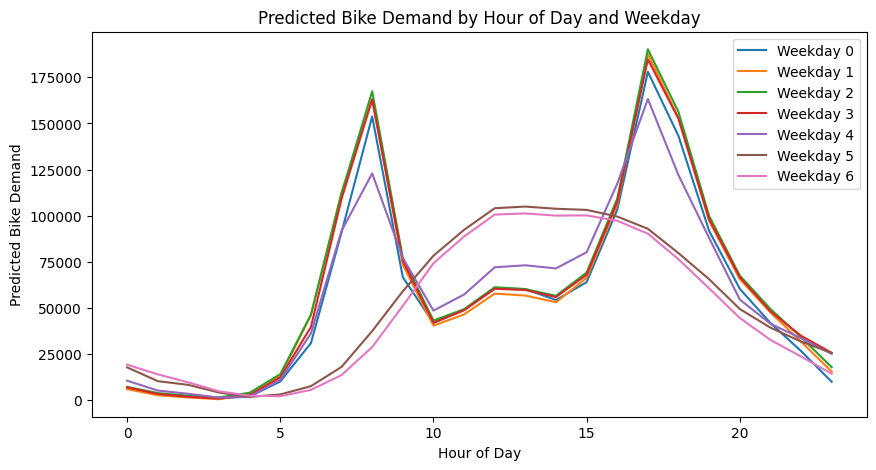

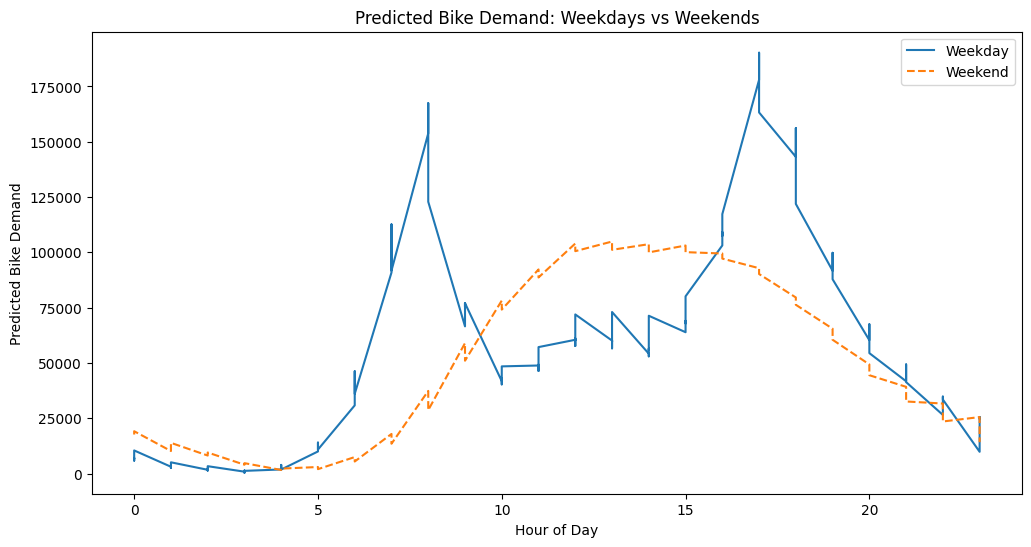

In [63]:
import matplotlib.pyplot as plt

# Plot demand by hour for a typical week (consider weekdays and weekends separately)
plt.figure(figsize=(10, 5))
for weekday in range(7):
    # Filter data for a specific weekday
    weekday_data = hour_day_combinations[hour_day_combinations['Weekday'] == weekday]
    plt.plot(weekday_data['Hour'], weekday_data['Predicted Demand'], label=f'Weekday {weekday}')

plt.xlabel('Hour of Day')
plt.ylabel('Predicted Bike Demand')
plt.title('Predicted Bike Demand by Hour of Day and Weekday')
plt.legend()
plt.show()

# Plot demand for weekend vs weekdays
weekday_data = hour_day_combinations[hour_day_combinations['Weekend'] == 0]
weekend_data = hour_day_combinations[hour_day_combinations['Weekend'] == 1]

plt.figure(figsize=(12, 6))
plt.plot(weekday_data['Hour'], weekday_data['Predicted Demand'], label='Weekday')
plt.plot(weekend_data['Hour'], weekend_data['Predicted Demand'], label='Weekend', linestyle='--')
plt.xlabel('Hour of Day')
plt.ylabel('Predicted Bike Demand')
plt.title('Predicted Bike Demand: Weekdays vs Weekends')
plt.legend()
plt.show()


Result interpretation for reporting purpose:


*   Predicted Bike Demand Hour of the day: Weekday Peak hours (7-8, 17-18) Weekend Peak hours (12-15)


*   Number of Bikes needed: Weekday Peak hours (above 175000) Weekend Peak hours (around 100000)






# Modeling 1 - Reducing Bike Availability Wait Time


2. Predict seasonal demand




In [42]:
# Extract month and aggregate monthly bike demand
filtered_df['Month'] = pd.to_datetime(filtered_df['Start date']).dt.month
monthly_demand = filtered_df.groupby(['Month', 'Start station number']).size().reset_index(name='Bike Demand')

# Define features and target
X = monthly_demand[['Month', 'Start station number']]
y = monthly_demand['Bike Demand']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_rf_pred)
r2_rf = r2_score(y_test, y_rf_pred)

# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)
mae_lr = mean_absolute_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)

# XGBRegressor Model
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_xgb_pred = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_xgb_pred)
r2_xgb = r2_score(y_test, y_xgb_pred)



In [46]:
# Display Results
print("Model Performance:")
print(f"Random Forest: MAE = {mae_rf:.2f}, R^2 = {r2_rf:.2f}")
print(f"Linear Regression: MAE = {mae_lr:.2f}, R^2 = {r2_lr:.2f}")
print(f"XGBRegressor: MAE = {mae_xgb:.2f}, R^2 = {r2_xgb:.2f}")

Model Performance:
Random Forest: MAE = 301.78, R^2 = 0.93
Linear Regression: MAE = 1672.20, R^2 = 0.01
XGBRegressor: MAE = 554.06, R^2 = 0.78


Random Forest:
MAE: 301.78 (lowest error among the models).
R^2 : 0.93 (explains 93% of the variance in bike demand).
This model performs exceptionally well, capturing the relationships in the data effectively.

Linear Regression:
MAE: 1672.20 (highest error).
R^2 : 0.01 (only explains 1% of the variance).
This model struggles to capture the complexities of the data, likely due to its assumption of linear relationships, which may not suit this problem.

XGBRegressor:
MAE: 554.06 (higher error than Random Forest but significantly better than Linear Regression).
R^2 : 0.78 (explains 78% of the variance).
This model performs well but not as effectively as Random Forest, possibly due to hyperparameters requiring further tuning.

In [47]:
# Save Predictions for the Best Model (Assume RF is the best for example)
monthly_demand['Predicted Bike Demand'] = rf_model.predict(X)
monthly_demand.to_csv('monthly_demand_predictions.csv', index=False)
print("Monthly demand predictions saved to 'monthly_demand_predictions.csv'")

Monthly demand predictions saved to 'monthly_demand_predictions.csv'


In [49]:
from google.colab import files
files.download('monthly_demand_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Modeling 2 - Optimizing Bike Distribution




1. Predict popular stations during peak hours for weekdays and weekends










In [51]:
# Aggregate bike usage by station and time features
filtered_df['Hour'] = pd.to_datetime(filtered_df['Start date']).dt.hour
filtered_df['Day number'] = pd.to_datetime(filtered_df['Start date']).dt.weekday  # Renamed 'Weekday' to 'Day number'
filtered_df['Weekend'] = filtered_df['Day number'].apply(lambda x: 1 if x >= 5 else 0)

station_usage = filtered_df.groupby(['Start station number', 'Day number', 'Hour']).size().reset_index(name='Bike Demand')

# Filter data for peak hours (Weekday Peak hours: 7-8, 17-18, Weekend Peak hours: 12-15)
peak_hour_usage = station_usage[
    ((station_usage['Day number'] < 5) & (station_usage['Hour'].isin([7, 8, 17, 18]))) |  # Weekday Peak
    ((station_usage['Day number'] >= 5) & (station_usage['Hour'].isin([12, 13, 14, 15])))  # Weekend Peak
]


In [52]:
# Display unique values in the 'Weekday' column
print(station_usage['Day number'].unique())


[0 1 2 3 4 5 6]


In [53]:
# Filter data for weekdays (Day number 0-4)
weekday_data = peak_hour_usage[peak_hour_usage['Day number'] < 5]

# Features and target for weekdays
X_weekday = weekday_data[['Hour', 'Day number', 'Start station number']]
y_weekday = weekday_data['Bike Demand']

# Split the weekday data into train and test sets
X_weekday_train, X_weekday_test, y_weekday_train, y_weekday_test = train_test_split(X_weekday, y_weekday, test_size=0.2, random_state=42)

# Train a RandomForestRegressor for weekdays
rf_model_weekday = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_weekday.fit(X_weekday_train, y_weekday_train)

# Predict on test data for weekdays
y_weekday_pred = rf_model_weekday.predict(X_weekday_test)

# Evaluate the model for weekdays
mae_weekday = mean_absolute_error(y_weekday_test, y_weekday_pred)
print(f"MAE for predicting bike demand on weekdays: {mae_weekday}")


MAE for predicting bike demand on weekdays: 49.17153749999999


In [54]:
# Predict for all stations during the weekday peak hours
weekday_data['Predicted Bike Demand'] = rf_model_weekday.predict(X_weekday)

# Find the top stations with the highest predicted bike demand
hot_stations = weekday_data.groupby('Start station number')['Predicted Bike Demand'].sum().reset_index()
hot_stations = hot_stations.sort_values(by='Predicted Bike Demand', ascending=False)

# Now, predict bike demand for the hot stations
# Select top 5 hot stations for example (you can adjust this number)
top_hot_stations = hot_stations.head(5)

# Filter data for the top hot stations
hot_station_data = weekday_data[weekday_data['Start station number'].isin(top_hot_stations['Start station number'])]

# Predict the bike demand for these hot stations
X_hot_stations = hot_station_data[['Hour', 'Day number', 'Start station number']]
y_hot_stations_pred = rf_model_weekday.predict(X_hot_stations)

# Add predictions to the data
hot_station_data['Predicted Bike Demand'] = y_hot_stations_pred

# Display the predicted bike demand for the hot stations
print(hot_station_data[['Start station number', 'Hour', 'Day number', 'Predicted Bike Demand']])



       Start station number  Hour  Day number  Predicted Bike Demand
20226                 31200     7           0                 666.94
20227                 31200     8           0                1608.08
20236                 31200    17           0                2401.74
20237                 31200    18           0                2618.81
20250                 31200     7           1                 693.80
...                     ...   ...         ...                    ...
50270                 31624    18           3                1550.30
50283                 31624     7           4                 959.13
50284                 31624     8           4                1877.90
50293                 31624    17           4                2272.55
50294                 31624    18           4                1540.85

[100 rows x 4 columns]


<ipython-input-54-814609088966>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekday_data['Predicted Bike Demand'] = rf_model_weekday.predict(X_weekday)
<ipython-input-54-814609088966>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hot_station_data['Predicted Bike Demand'] = y_hot_stations_pred


In [55]:
# Save the hot station data (including predictions) to a CSV file
hot_station_data.to_csv('predicted_bike_demand_hot_stations.csv', index=False)

from google.colab import files

# Download the CSV file to your local machine
files.download('predicted_bike_demand_hot_stations.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top 5 most popular station bike demand prediction result has been saved into a csv.

The report will use the csv to further assist in distribution of bikes.

# Modeling 2 - Optimizing Bike Distribution




2. Predict popular stations for seasonal data


In [65]:
# Predict bike demand for all monthly data using the Random Forest model
monthly_demand['Predicted Bike Demand'] = rf_model.predict(X)

# Aggregate predicted demand by station
hot_stations_monthly = monthly_demand.groupby('Start station number')['Predicted Bike Demand'].sum().reset_index()

# Sort stations by predicted demand in descending order
hot_stations_monthly = hot_stations_monthly.sort_values(by='Predicted Bike Demand', ascending=False)

# View the top stations
print(hot_stations_monthly.head(10))  # Show top 10 hot stations

# Save the results to a CSV file
hot_stations_monthly.to_csv('hot_stations_monthly.csv', index=False)

# Display success message
print("Hot station predictions saved to 'hot_stations_monthly.csv'.")


     Start station number  Predicted Bike Demand
316                 31623              200287.01
130                 31200              126884.39
187                 31258              120597.62
131                 31201              120296.28
176                 31247              108210.41
178                 31249               94601.47
158                 31229               90552.12
296                 31603               89935.88
101                 31101               88211.87
293                 31600               88131.21
Hot station predictions saved to 'hot_stations_monthly.csv'.


In [66]:
from google.colab import files
files.download('hot_stations_monthly.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# The rest is more data visulization rather than machine learning model, so Maria you can include the below in your part if you want to, and I will delete them.

# Modeling 3 - Improving User Satisfaction



*   Analyze patterns for average duration by Member Type






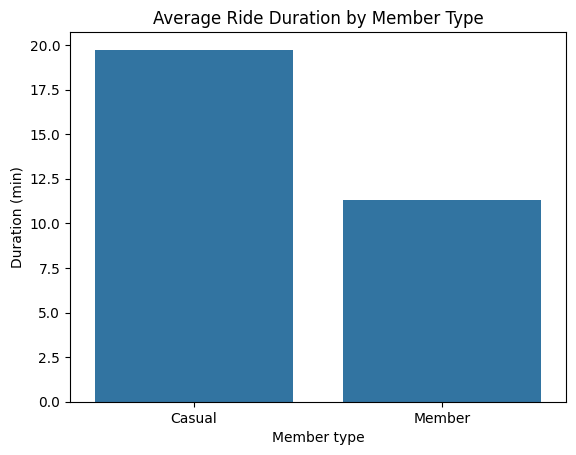

In [ ]:
# Calculate average duration by member type
member_duration = filtered_df.groupby('Member type')['Duration (min)'].mean().reset_index()

# Visualize
sns.barplot(data=member_duration, x='Member type', y='Duration (min)')
plt.title('Average Ride Duration by Member Type')
plt.show()


# Modeling 4 - Increasing Market Share


*   Identify growth trends over time









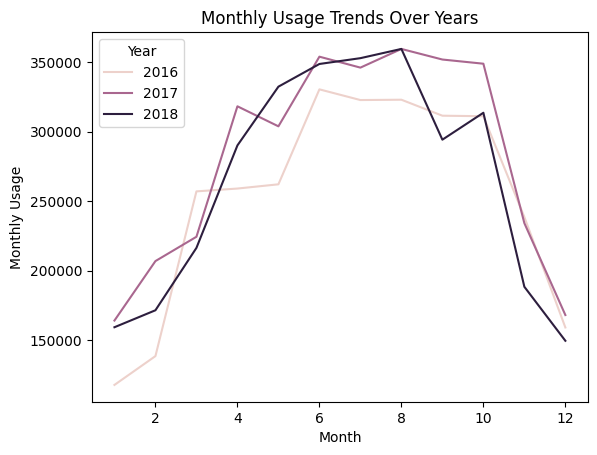

In [ ]:
# Group data by year and month
monthly_usage = filtered_df.groupby(['Year', 'Month']).size().reset_index(name='Monthly Usage')

# Plot trends
sns.lineplot(data=monthly_usage, x='Month', y='Monthly Usage', hue='Year')
plt.title('Monthly Usage Trends Over Years')
plt.show()
